# Class 19 - MCODE

In [ ]:
suppressPackageStartupMessages(library(sna))
library(readr)
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(expm))
suppressPackageStartupMessages(library(ProNet))

In [104]:
test_adjmat <- read.dot("testr.dot")
test_adjmat <- test_adjmat + t(test_adjmat)
test_igraph <- igraph::graph_from_adjacency_matrix(test_adjmat, mode="undirected")
summary(test_igraph)

IGRAPH 59155dd UN-- 13 26 -- 
+ attr: name (v/c)


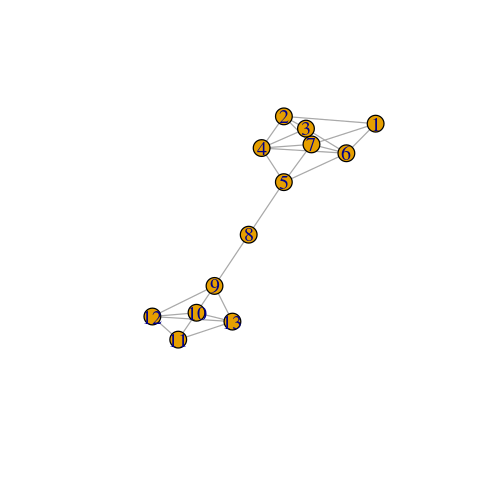

In [105]:
plot(test_igraph)

Run ProNet::mcode on your test graph with the default parameters; what cluster sizes do you get back?

In [106]:
ProNet::mcode(test_igraph)

$COMPLEX
$COMPLEX[[1]]
[1] 1 2 3 4 5 6 7

$COMPLEX[[2]]
[1]  9 10 11 12 13


$score
[1] 5.0 4.5

Load the Krogan et al. network edge-list as a dataframe

In [129]:
edge_list_df <- unique(readr::read_tsv("krogan.sif", 
                              col_names=c("protein1","protein2"),
                              col_types=cols()))

head(edge_list_df)

protein1,protein2
AAC3,PMR1
AAP1,GUD1
AAP1,TRS31
AAP1,GCN3
AAP1,MDY2
AAR2,SMD1


Make an igraph graph out of your edge-list data frame (undirected); print a summary

In [130]:
big_graph <- igraph::graph_from_data_frame(edge_list_df, directed=FALSE)
summary(big_graph)

IGRAPH 2294070 UN-- 2674 7079 -- 
+ attr: name (v/c)


Plot the degree distribution of your graph, on log-log scale

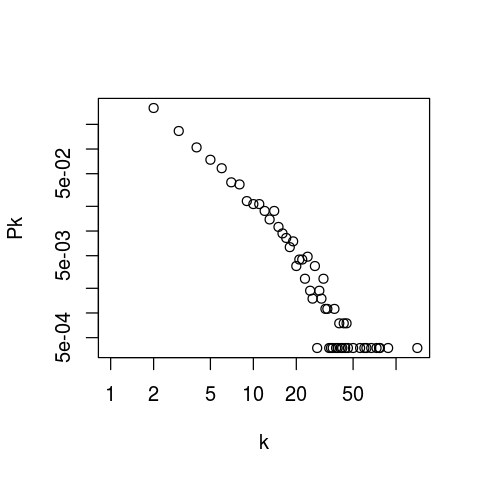

In [131]:
suppressWarnings(plot(degree_distribution(big_graph), log="xy", xlab="k", ylab="Pk"))

Run ProNet::mcode on your graph, with vwp=0.2 and fdt=0.1; print out the cluster sizes that you get bakc

In [136]:
res <- ProNet::mcode(big_graph, haircut=TRUE, fluff=TRUE, vwp=0.2, fdt=0.1)
s_vals <- sapply(res$COMPLEX, length)
sort(s_vals, decreasing=TRUE)


[1] 1308   80   70   61   43   41   40   33   28   23   22   22   19   17   17
[16]   16   16   14   13   13   13   11   10   10   10   10   10    9    9    9
[31]    9    9    8    8    8    7    7    7    7    7    7    6    6    6    6
[46]    6    6    6    6    5    5    5    5    5    5    5    4    4    4    4
[61]    4    4    4    4    4    4    4    4    4    4    4    4    4    3    3
[76]    3    3    3    3    3    3    3    3    3    3    3    3    3    3

Print a histogram of log N(S) vs. log cluster size S.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"3 y values <= 0 omitted from logarithmic plot"

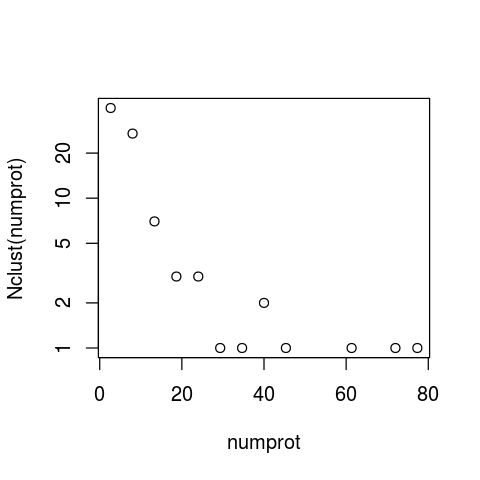

In [161]:
s_bins <- (0:15)*80/15
hist_res <- hist(s_vals[-1],breaks=s_bins, plot=FALSE)
plot(hist_res$mids, hist_res$counts, log="y", xlab="numprot", ylab="Nclust(numprot)")